In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [54]:
df=pd.read_html('Trade_Map_-_Bilateral_trade_between_Dominican_Republic_and_Haiti.xls',header=0)
df1=df[3]
df1.head(2)

,Product code,Product label,Dominican Republic's exports to Haiti,Dominican Republic's exports to Haiti.1,Dominican Republic's exports to Haiti.2,Dominican Republic's exports to Haiti.3,Dominican Republic's exports to Haiti.4,Dominican Republic's exports to Haiti.5,Dominican Republic's exports to Haiti.6,Dominican Republic's exports to Haiti.7,...,Dominican Republic's exports to world.11,Dominican Republic's exports to world.12,Dominican Republic's exports to world.13,Dominican Republic's exports to world.14,Dominican Republic's exports to world.15,Dominican Republic's exports to world.16,Dominican Republic's exports to world.17,Dominican Republic's exports to world.18,Dominican Republic's exports to world.19,Dominican Republic's exports to world.20
0,Product code,Product label,Value in 2003,Value in 2004,Value in 2005,Value in 2006,Value in 2007,Value in 2008,Value in 2009,Value in 2010,...,Value in 2013,Value in 2014,Value in 2015,Value in 2016,Value in 2017,Value in 2018,Value in 2019,Value in 2020,Value in 2021,Value in 2022
1,'TOTAL,All products,282058,268466,375471,698126,555472,1189286,680345,801953,...,7960984,9927796,8384108,9785186,10224662,9395611,10078188,9848863,11831534,12390307


In [57]:
cols=['Code','Label']
cols.extend([str(i)[-4::] for i in df1.iloc[0,:]][2:])
df1.columns=cols
df1.head(2)



In [144]:
df2=df1[['Code','Label','2022']]
df2.columns=['Code','Label','Export_to_HT','HT_Imports_World','Export_to_World']
df2=df2.loc[1:,:]
df2.head(4)

,Code,Label,Export_to_HT,HT_Imports_World,Export_to_World
1,'TOTAL,All products,1040035,4240236,12390307
2,'52,Cotton,179132,184604,182238
3,'39,Plastics and articles thereof,134623,229412,703696
4,'61,"Articles of apparel and clothing accessories, ...",99256,149341,545364


In [145]:
df2['Export_to_HT']=np.float64(df2['Export_to_HT'])
df2['Export_to_World']=np.float64(df2['Export_to_World'])
df2['HT_Imports_World']=np.float64(df2['HT_Imports_World'])
df2=df2.reset_index()
df2.head(5)

,index,Code,Label,Export_to_HT,HT_Imports_World,Export_to_World
0,1,'TOTAL,All products,1040035.0,4240236.0,12390307.0
1,2,'52,Cotton,179132.0,184604.0,182238.0
2,3,'39,Plastics and articles thereof,134623.0,229412.0,703696.0
3,4,'61,"Articles of apparel and clothing accessories, ...",99256.0,149341.0,545364.0
4,5,'15,"Animal, vegetable or microbial fats and oils a...",84768.0,210804.0,97264.0


In [146]:
# remove rows of products where export to Haiti is zero
df2=df2[df2['Export_to_HT']!=np.float64(0)]

In [147]:
df2['Export_to_HT'].shape,(df2['Export_to_World']).shape

((87,), (87,))

In [156]:
share=[]
for i in range(df2.shape[0]):
    share.append((df2.Export_to_HT[i])/(df2.Export_to_World[i])*100)

df2['Share_Export_to_HT']=share

df2=df2[df2['Share_Export_to_HT']>=50]
df2=df2.sort_values('Share_Export_to_HT',ascending=True)
df2=df2.reset_index()
df2=df2.iloc[:,2:]
df2


,Label,Export_to_HT,HT_Imports_World,Export_to_World,Share_Export_to_HT
0,Special woven fabrics; tufted textile fabrics;...,6207.0,13117.0,12047.0,51.523201
1,Salt; sulphur; earths and stone; plastering ma...,57919.0,98808.0,99825.0,58.020536
2,Carpets and other textile floor coverings,3.0,230.0,5.0,60.000000
3,"Preparations of meat, of fish, of crustaceans,...",1938.0,22028.0,3206.0,60.449158
4,"Preparations of cereals, flour, starch or milk...",55512.0,124963.0,91191.0,60.874428
5,Tanning or dyeing extracts; tannins and their ...,12175.0,18843.0,17981.0,67.710361
6,Musical instruments; parts and accessories of ...,159.0,188.0,233.0,68.240343
7,"Umbrellas, sun umbrellas, walking sticks, seat...",58.0,1178.0,83.0,69.879518
8,Photographic or cinematographic goods,210.0,323.0,289.0,72.664360
9,Man-made filaments; strip and the like of man-...,6511.0,26236.0,8226.0,79.151471


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

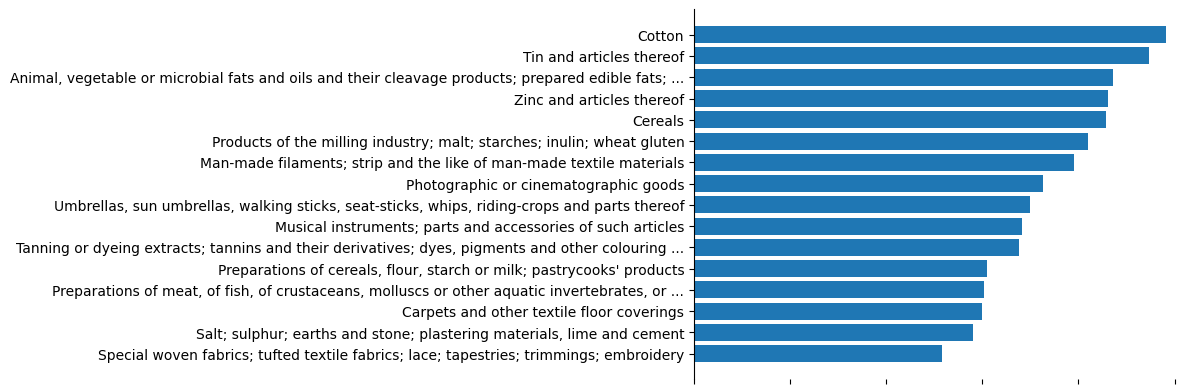

In [159]:
fig=plt.subplot()
plt.barh(df2.Label,df2.Share_Export_to_HT)
for i in range(len(df2,)):
    plt.text(x=dd.Share_Export_to_HT[i]+0.015,y=dd.index[i],s=str(round(dd.Percentage[i],1))+'%',color='black')

fig.spines[['right', 'top','bottom']].set_visible(False) 
plt.xticks(visible=False)

0.08393940521409195